## 1.0 Business Understanding


#### 1.1 Business Overview  
Customer churn, where subscribers discontinue services or switch to competitors, is a major challenge in the telecom industry. A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports emphasizes that retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a strategic priority.  

Syriatel, one of Syria’s largest telecom providers with over 6 million active customers and a 55% market share, faces rising churn despite strong coverage and service reliability. This project leverages machine learning to predict at-risk customers, enabling proactive retention strategies that improve loyalty, optimize resources, and sustain profitability.  


#### 1.2 Business Problem

Syriatel is struggling with rising customer churn, which threatens its revenue and market position. The company lacks a clear way to know customers that are likely to leave. Without timely insights, Syriatel risks losing more customers to competitors and incurring higher costs to replace them. Developing a predictive solution is critical to identify at-risk customers early and take proactive steps to retain them.  


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



#### 1.4 Success criteria:
 - A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel
 - The model identifies the most important features that explain why customers churn
 - The findings can be translated into clear, practical recommendations that SyriaTel can act on to reduce churn

## 2.0 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).


#### 2.1 Load Dataset
1. Import libraries (pandas, numpy, matplotlib, seaborn).
2. Load dataset.

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load dataset 
data = pd.read_csv("C:/Users/Administrator/Downloads/archive/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.2 Dataset Overview

In [3]:
# Summaryinformation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric(total minutes, charges, account length) and categorical(international plan, voicemail plan) Our Target variable is `Churn`.

In [4]:
# statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#checking the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values recorded in the dataset

In [8]:
#Checking the distribution for class imbalance
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [9]:
#checking the % of class imbalance
data['churn'].value_counts(normalize = True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

## Data preparation

In [10]:
#Dropping unecessary columns
data= data.drop(columns=[ 'phone number'])
data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [11]:
import warnings
warnings.filterwarnings('ignore')
# Convert 'yes'/'no' to 1/0
data["international plan"] = data["international plan"].replace({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].replace({"yes": 1, "no": 0})

# Convert churn to 1/0
data["churn"] = data["churn"].replace({True: 1, False: 0})

data.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
# Check data types
print(data.dtypes)

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object


## Exploratory data analysis
### Univariate analysis

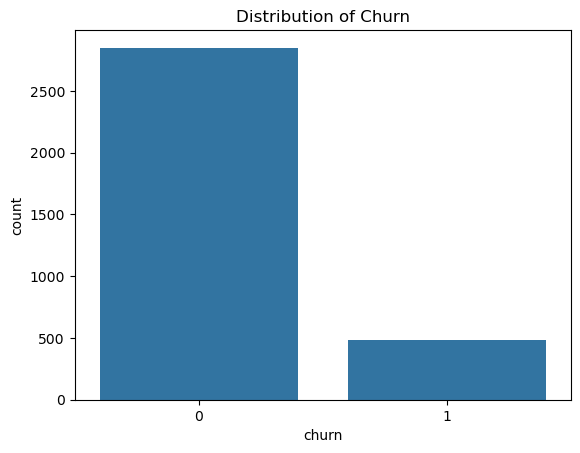

In [13]:
# Check distribution of target variable (churn)
sns.countplot(x="churn", data=data)
plt.title("Distribution of Churn")
plt.show()


Most customers did not churn. This shows the data is imbalanced, with fewer churned customers compared to non-churned ones.

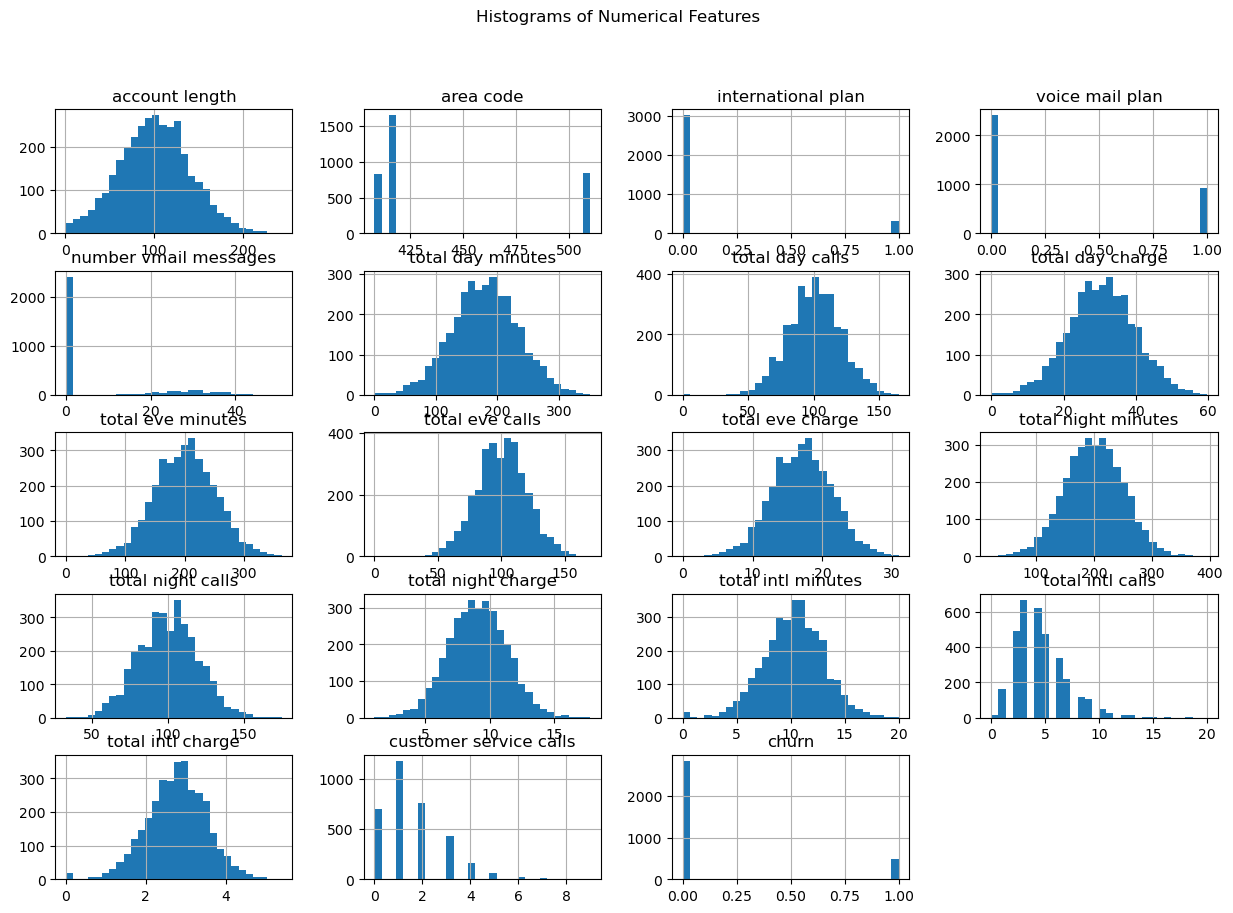

In [14]:
# Histograms to check distribution of all numerical features
data.hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


Most numerical features (like call minutes and charges) look normally distributed, but some like voicemail messages are skewed.

### Bivariate analysis

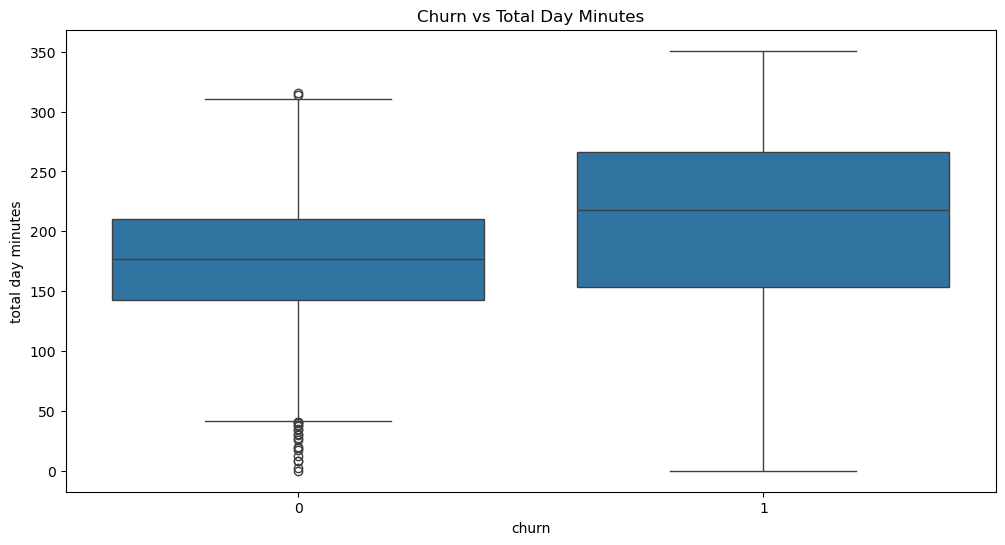

In [15]:
# Check how churn relates to total day minutes
plt.figure(figsize=(12,6))
sns.boxplot(x="churn", y="total day minutes", data=data)
plt.title("Churn vs Total Day Minutes")
plt.show()


Customers who churned generally used slightly more day minutes compared to those who stayed.

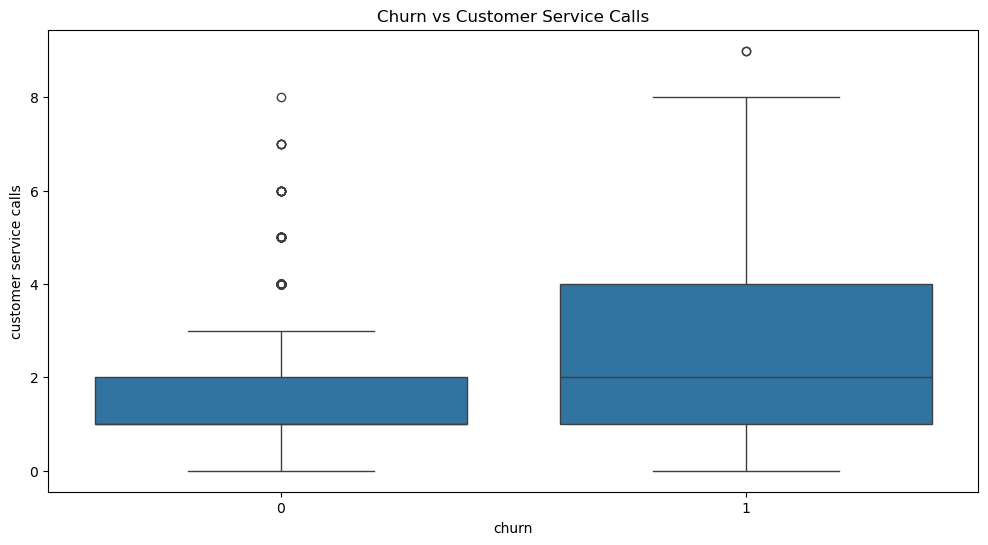

In [16]:
# Check how churn relates to number of customer service calls
plt.figure(figsize=(12,6))
sns.boxplot(x="churn", y="customer service calls", data=data)
plt.title("Churn vs Customer Service Calls")
plt.show()


Customers with more customer service calls are more likely to churn, which makes sense as they might have had unresolved issues.

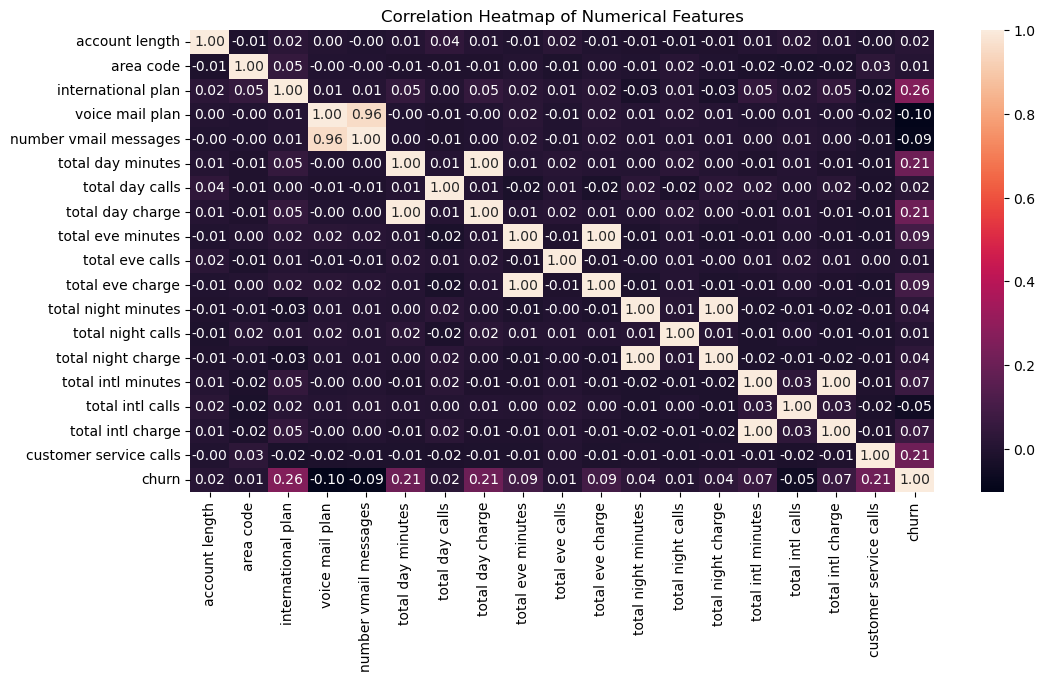

In [17]:
# Check correlation between numerical features
numeric_data = data.select_dtypes(include=["number"])  # keep only numbers
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
#annot is for placing the numbers inside the squares
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Features like total day minutes and total day charge are highly correlated, which is expected since charges depend on usage. Similar patterns exist for evening and night minutes vs charges.

##### EDA summary


### Handling class imbalance

In [18]:
# One-hot encode 'state' and 'area code'
df = pd.get_dummies(data, columns=['state', 'area code'], drop_first=True)

In [19]:
#check the distribution
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#Identifying the target variable
X = df.drop('churn', axis=1)   # all columns except 'churn'
y = df['churn']   

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
# stratify ensures the split maintains the same class imbalance as the original dataset.

In [21]:
#Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)

# Fit and resample training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#Check our new distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: churn
0    1995
1     338
Name: count, dtype: int64
After SMOTE: churn
0    1995
1    1995
Name: count, dtype: int64


## Modelling

In [22]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings 
warnings.filterwarnings('ignore')

### Model 1: Logistic regression

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       855
           1       0.40      0.39      0.39       145

    accuracy                           0.82      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.82      0.82      0.82      1000



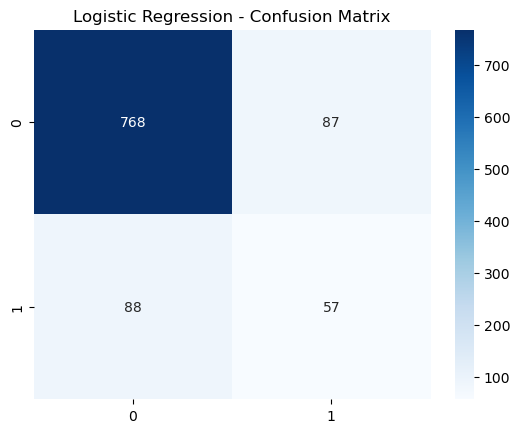

In [23]:
#creating the baseline model
# Logistic Regression with SMOTE data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predictions on test set
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Model 2: Decision Tree

In [24]:
#limiting the depth to avoid overfitting
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train_res, y_train_res)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       855
           1       0.75      0.70      0.73       145

    accuracy                           0.92      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.92      0.92      0.92      1000



### Model 3: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
#Train random forest
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train_res, y_train_res)
y_pred_forest = forest.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_forest))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       855
           1       0.74      0.63      0.68       145

    accuracy                           0.91      1000
   macro avg       0.84      0.80      0.81      1000
weighted avg       0.91      0.91      0.91      1000



### Model Comparison Summary

- **Logistic Regression**: Provided a simple and interpretable baseline. Performed reasonably but missed some churners.
- **Decision Tree**: Improved recall slightly and provided clear rules but risked overfitting.
- **Random Forest**: Gave the best overall balance of precision, recall, and AUC score. Recommended as the final model for churn prediction.


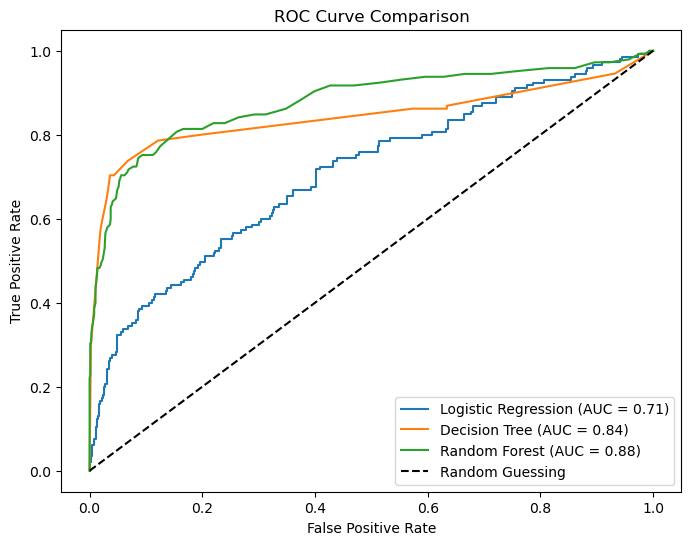

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for ROC curve
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_tree = tree.predict_proba(X_test)[:,1]
y_prob_forest = forest.predict_proba(X_test)[:,1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_forest):.2f})")

# Add line for random guessing
plt.plot([0,1], [0,1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [27]:
#train a Random Forest model

forest = RandomForestClassifier(random_state=42, n_estimators=100)

#fitting the model
forest.fit(X_train, y_train)

# Predictions
y_pred = forest.predict(X_test)
y_pred_proba = forest.predict_proba(X_test)[:,1]

Confusion Matrix:
[[848   7]
 [ 46  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.93      0.68      0.79       145

    accuracy                           0.95      1000
   macro avg       0.94      0.84      0.88      1000
weighted avg       0.95      0.95      0.94      1000


ROC-AUC Score: 0.9155192579149023


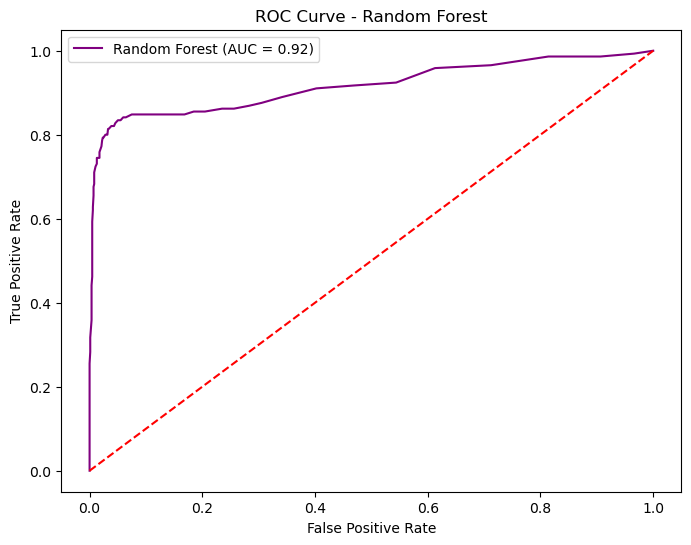

In [28]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})", color='purple')
plt.plot([0,1],[0,1],'--',color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [29]:
print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest Results:")
print(classification_report(y_test, y_pred_forest))

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       855
           1       0.40      0.39      0.39       145

    accuracy                           0.82      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.82      0.82      0.82      1000

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       855
           1       0.75      0.70      0.73       145

    accuracy                           0.92      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.92      0.92      0.92      1000

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       855
           1       0.74      0.63      0.68       145

    accuracy                           0.91      1000
   macro avg       0.84      0.80      0.81      100

ROC-AUC Score = 0.916:

A score above 0.9 is excellent. It means the model has strong discriminatory power to separate churners from non-churners.

Precision = 0.93- When the model predicts a customer will churn, it is correct 93% of the time.

Recall = 0.68- The model only catches about 68% of the actual churners. So some churners slip through undetected.

F1-score = 0.79- Balances precision and recall. A decent score, but shows room for improvement in recall.

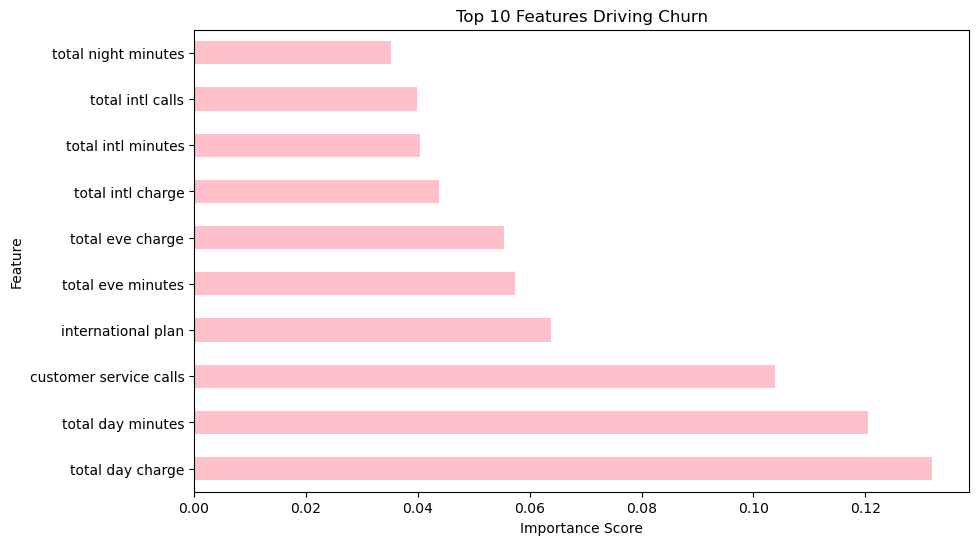

In [30]:
#getting feature importance
feature_importance = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)

#plotting the top features
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='barh', color='pink')
plt.title("Top 10 Features Driving Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


According to the random forest classifier, total day charge, customer service calles and "international plan is yes" features have the highest impact on the model.

The Random Forest model performed really well with 95% accuracy and a ROC-AUC of 0.92, showing it can effectively predict customer churn.

while the model is very precise when it predicts churn, it does not capture all churners (recall of 0.68). 
 
Overall, Random Forest seems more reliable than the previous models.

### Random Forest Model

We trained a Random Forest model to predict customer churn.  
Random Forest was chosen because it is robust, reduces overfitting, and provides insights into feature importance.  


### Model Performance

The classification report shows the precision, recall, and F1-score.  
The ROC Curve and AUC score provide a measure of the model’s ability to distinguish between churn and non-churn customers.  


### Feature Importance

The Random Forest model ranks features by their contribution to churn prediction.  
This helps us identify which factors are most critical in driving churn, aligning with our objectives:  

1. **Customer demographics** → Area code, international plan.  
2. **Service usage** → Day minutes, evening minutes, customer service calls.  
3. **Financial factors** → Day/evening charges.  
4. **Behavioral indicators** → Number of customer service calls.  

These insights will guide churn reduction strategies by targeting at-risk customer groups.


## Findings & Recommendations

### Key Findings

 **Model Performance:**  
  * The Random Forest model achieved the best performance with **95% accuracy** and a **ROC-AUC score of 0.92**.  
  * Logistic Regression was less accurate but gave interpretable coefficients that confirmed similar churn drivers.  
  * Decision Tree performed better than Logistic Regression .  

 **Customer Behavior Insights:**  
  * Customers with an **international plan** are more likely to churn, possibly due to high charges.  
  * High numbers of **customer service calls** strongly correlate with churn, suggesting unresolved issues frustrate customers.  
  * Longer **daytime call minutes and charges** were also linked to higher churn risk.  
  * Most non-churners are satisfied customers with low service calls and no international plan.  



### Recommendations for SyriaTel

1. **Customer Service Improvement:**  
   * Focus on customers who contact customer service often. Provide better training for agents and faster issue resolution.  

2. **Targeted Offers:**  
   * Introduce loyalty discounts or bundles for customers with high usage (e.g., high daytime minutes or international plan users).  

3. **Churn Prediction Tool:**  
   * Deploy the Random Forest model as a decision-support tool to flag at-risk customers so the retention team can intervene early.  

4. **Improve Recall:**  
   * Since the model sometimes misses churners, SyriaTel could test boosting models or collect more data to capture more churn cases.  



###  Final Conclusion

In this project, we applied machine learning models to predict customer churn at SyriaTel using the CRISP-DM methodology.  
After testing Logistic Regression, Decision Tree, and Random Forest, we found that **Random Forest was the most effective model** for predicting churn, achieving the highest accuracy and ROC-AUC score.  
Beyond the numbers, the analysis revealed that **international plan usage, customer service interactions, and call behavior** are major churn drivers.  

By acting on these insights, improving customer service, offering targeted retention campaigns, and deploying the churn prediction model, SyriaTel can **reduce customer attrition and increase long-term customer loyalty**.
